## Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
from herdingspikes.hs2 import HSDetection
from herdingspikes.probe import HierlmannVisapyEmulationProbe
import matplotlib.pyplot as plt
import h5py
import numpy as np
from PIL import Image

np.random.seed(0)

In [2]:
import urllib
file_url = 'https://datasync.ed.ac.uk/public.php/webdav'

password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
password_mgr.add_password(None, file_url, "GbnXJ5bU3m9JPau", "HS2")
handler = urllib.request.HTTPBasicAuthHandler(password_mgr)
opener = urllib.request.build_opener(handler)
opener.open(file_url)
urllib.request.install_opener(opener)
with urllib.request.urlopen(file_url) as response, open('visapy_data.npy', 'wb') as out_file:
    data = response.read()
    out_file.write(data)

# raw data location
data_path = 'visapy_data.npy'

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils import data

torch.cuda.set_device(0)
torch.manual_seed(0)

## Spike Detection

In [4]:
# detection parameters
to_localize = True
cutout_start = 14
cutout_end = 36
threshold = 24
file_directory = 'results/'
file_name = 'ProcessedSpikes_visapy'

In [5]:
Probe = HierlmannVisapyEmulationProbe('visapy_data.npy')
H = HSDetection(Probe, to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name, 
                file_directory_name=file_directory, save_all=True)
H.DetectFromRaw()
H.LoadDetected()

File size: 122400102
Number of channels: 102
# Sampling rate: 32000
# Localization On
# Not Masking any Channels
# Writing out extended detection info
# Number of recorded channels: 102
# Analysing frames: 1200001, Seconds:37.50003125
# Frames before spike in cutout: 32
# Frames after spike in cutout: 70
# tcuts: 44 59
# tInc: 50000
# Analysing 50000 frames; from -44 to 50059
# Analysing 50000 frames; from 49956 to 100059
# Analysing 50000 frames; from 99956 to 150059
# Analysing 50000 frames; from 149956 to 200059
# Analysing 50000 frames; from 199956 to 250059
# Analysing 50000 frames; from 249956 to 300059
# Analysing 50000 frames; from 299956 to 350059
# Analysing 50000 frames; from 349956 to 400059
# Analysing 50000 frames; from 399956 to 450059
# Analysing 50000 frames; from 449956 to 500059
# Analysing 50000 frames; from 499956 to 550059
# Analysing 50000 frames; from 549956 to 600059
# Analysing 50000 frames; from 599956 to 650059
# Analysing 50000 frames; from 649956 to 700059

## Listing down all event frames

##### There are 102 channels which have recorded 1200001 data points each. Hence we have 1200001 frames to assess

In [6]:
data = np.load('visapy_data.npy')
# i = 101
# print(data[i*1200001: (i+1)*1200001])

In [7]:
total_frames = (int)(data.shape[0]/102)
frame_set = np.zeros((102, total_frames))
for i in range(102):
    frame_set[i, :] = data[i*total_frames:(i+1)*total_frames]
frame_set = frame_set.T
print("Frame shape: ", frame_set.shape)
print("Whole Dataset: ", frame_set)

Frame shape:  (1200001, 102)
Whole Dataset:  [[  4.   7.   8. ...  23.  -6.   2.]
 [-18.   8.   2. ...  16.  -4. -21.]
 [  3.  -8.  27. ...  -2.  -2. -15.]
 ...
 [-24. -12.  12. ...  17. -39.  15.]
 [ -2.   7.  -3. ...   7. -12.   0.]
 [-26.  -7.   0. ...  32.  -1.  10.]]


##### Finding electrode positions

In [8]:
x_path = 'z_integer.npy'
y_path = 'y_integer.npy'
elec_x_int = np.load(x_path)
elec_y_int = np.load(y_path)

In [9]:
ky = 9 / np.max(np.diff(sorted(elec_y_int)))
elec_x = elec_x_int * ky
elec_y = elec_y_int * ky
elec_x -= np.min(elec_x)
elec_y -= np.min(elec_y)

In [10]:
datapoints = []
for i in range(len(elec_x)):
    datapoints.append([elec_x[i], elec_y[i]])
datapoints = np.asarray(datapoints)
print(datapoints)

[[ 59.54058193 179.98346095]
 [  0.         233.97886677]
 [ 74.42572741 242.97794793]
 [ 59.54058193  17.99816233]
 [ 29.77029096  35.99632466]
 [ 59.54058193 143.98621746]
 [ 44.65543645 242.97794793]
 [ 14.88514548 296.97243492]
 [ 74.42572741  44.99540582]
 [  0.         107.9898928 ]
 [ 29.77029096 143.98621746]
 [  0.          17.99816233]
 [ 59.54058193  53.99448698]
 [ 44.65543645  80.99264931]
 [ 74.42572741 170.98437979]
 [ 44.65543645 206.98070444]
 [  0.         197.98162328]
 [ 14.88514548 278.97427259]
 [ 44.65543645 296.97243492]
 [ 14.88514548  44.99540582]
 [ 59.54058193  89.99173047]
 [  0.         215.9797856 ]
 [ 74.42572741 278.97427259]
 [ 14.88514548  26.99724349]
 [ 44.65543645  44.99540582]
 [ 44.65543645  98.99081164]
 [ 74.42572741 152.98621746]
 [ 29.77029096   0.        ]
 [ 74.42572741  26.99724349]
 [  0.          53.99448698]
 [ 44.65543645 134.98713629]
 [ 44.65543645  62.99356815]
 [ 59.54058193 287.97335375]
 [ 59.54058193 215.9797856 ]
 [ 59.54058193

##### Converting signals from each electrode in one frame to images

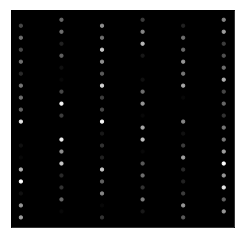

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.set_facecolor("black")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
frame_set = np.abs(frame_set)
max_value = np.amax(frame_set)
normalised_frame = frame_set/max_value
colors = normalised_frame[394, :]
ax.scatter(elec_x, elec_y, c=colors, s=10, cmap='Greys_r')
plt.show()

##### Better visualisation

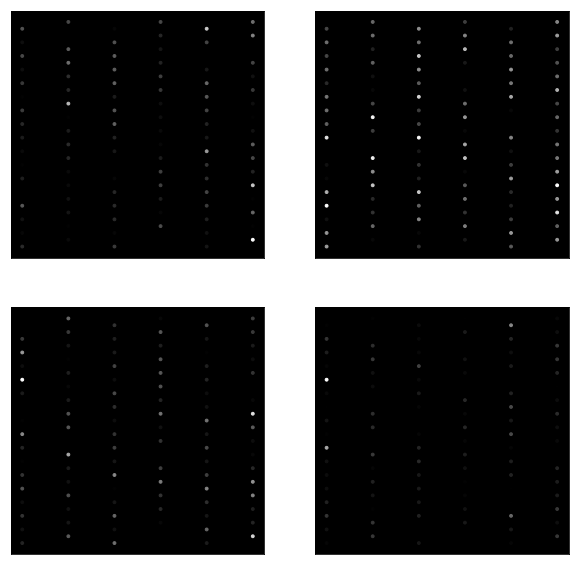

In [57]:
%matplotlib inline

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax_list = [ax1, ax2, ax3, ax4]
for ax in ax_list:
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_facecolor("black")
    ax.set_yticklabels([])
    ax.set_xticklabels([])
frame_set = np.abs(frame_set)
max_value = np.amax(frame_set)
index = -1
for i in [393, 394, 395, 396]:
    index += 1
    colors = normalised_frame[i, :]/max_value
    ax_list[index].scatter(elec_x, elec_y, c=colors, s=8, cmap='Greys_r')
plt.show()

In [13]:
print(H.spikes)

       ch        t  Amplitude       x        y  \
0      26      395       5439  64.550  146.480   
1      35      478       6359  31.835   67.175   
2      58      515       6031  61.038  267.137   
3      68      539       6580  12.200   63.673   
4      65      577       4436  13.483  234.357   
5      93      597       8700  44.558   28.816   
6      98      604       8182  53.929  118.834   
7      57      626       5685  12.352  278.124   
8      60      807       6195   9.359  154.280   
9      72      874       6763  63.996  139.242   
10     95      905       7091  63.308  227.632   
11     65      926       4859  19.547  234.016   
12     87      937       6172  20.619  102.775   
13     22      952       5672  64.872  272.721   
14     58     1004       4476  57.126  265.010   
15     35     1048       6736  31.944   64.590   
16     13     1112       5073  49.026   79.671   
17     96     1165       6312  60.978   29.642   
18     39     1187       5938  11.467   64.993   


In [61]:
list_times = H.spikes['t'].tolist()
list_times = np.asarray(list_times) - 1
list_ch = H.spikes['ch'].tolist()
print(list_times)

[    394     477     514 ... 1149752 1149776 1149785]


In [62]:
x = H.spikes['x'].tolist()
y = H.spikes['y'].tolist()

print(len(x), len(list_times))

19341 19341


In [63]:
frame_set = np.abs(frame_set)
max_value = np.amax(frame_set)
normalised_frame = frame_set/max_value

In [64]:
%matplotlib notebook

plt.ioff()
for i in range(len(list_times)):
    fname = "frames/frame_"+str(list_times[i])+"_"+str(list_ch[i])+".png"
    fig, ax = plt.subplots(1, 1, figsize=(2,2), facecolor='black')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_facecolor("black")
    colors = normalised_frame[i, :]
    ax.scatter(elec_x, elec_y, c=colors, s=10, cmap='Greys_r')
    fig.set_tight_layout(True)
    fig.savefig(fname, frameon=False, facecolor='black')